In [1]:
from pathlib import Path
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sys.path.append("..")

from util_image import (
    get_annotation_from_mask_file,
    get_mask_file,
    invert_mask,
    pil_to_array_1c,
    pil_to_array_3c,
)

In [2]:
obj_dir = Path.cwd().parent / "hawking_data_dir" / "objects_dir" / "cart"
obj_path = list(obj_dir.glob("*.jpg"))[10]

dis_dir = (
    Path.cwd().parent /
    "hawking_data_dir"/
    "distractor_objects_dir" /
    "hemp_sack"
)
dis_path = list(dis_dir.glob("*.jpg"))[0]

In [7]:
obj_mask_file = get_mask_file(obj_path)
o_xmin, o_xmax, o_ymin, o_ymax = get_annotation_from_mask_file(
    obj_mask_file, True
)

dis_mask_file = get_mask_file(dis_path)
d_xmin, d_xmax, d_ymin, d_ymax = get_annotation_from_mask_file(
    dis_mask_file, True
)

In [8]:
obj_foreground = Image.open(obj_path)
obj_mask = invert_mask(Image.open(obj_mask_file))

dis_foreground = Image.open(dis_path)
dis_mask = invert_mask(Image.open(dis_mask_file))

In [5]:
# obj_foreground = obj_foreground.crop((xmin, ymin, xmax, ymax))
# obj_mask = obj_mask.crop((xmin, ymin, xmax, ymax))

# orig_w, orig_h = obj_foreground.size

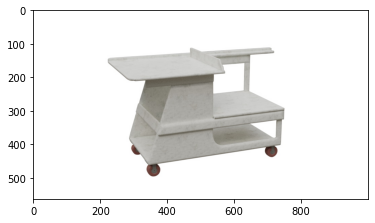

In [5]:
fig, ax = plt.subplots(1, 1)
ax.imshow(obj_foreground)

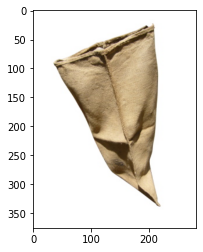

In [9]:
fig, ax = plt.subplots(1, 1)
ax.imshow(dis_foreground)

In [14]:
obj_foreground.paste(dis_foreground, (400, -100), dis_mask)

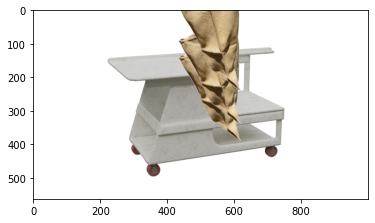

In [15]:
fig, ax = plt.subplots(1, 1)
ax.imshow(obj_foreground)